# Monte Carlo Method for Solving Integration

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from scipy.integrate import quad as integrate

### Concept

This notebook shows another application of uniformly disributed random numbers: integration. Using the Monte Carlo method, it is possible to estimate the value of areas under any continuous curve, saving potential time by avoiding complex math and logic.

An example of manual integration on a simple function:

$f(x) = x^2 + 2$

$Area = \int_a^bf(x) dx$

$= \int_a^b (x^2+2) dx$

$= \left.\frac{x^3}{3}+2x\right\vert_1^2$

$= (\frac{8}{3}+4) - (\frac{1}{3}+2)$

$= \frac{13}{3}$

To integrate the function $f(x)$ over the interval $[a,b]$ with the Monte Carlo method we

[1] find some value $M$ such that $f(x) < M$ over the interval $[a,b]$

[2] select a random number $x$ from a uniform distribution over the interval $[a,b]$

[3] select a random number y from a uniform distribution over the interval $[0,M]$

[4] determine if $y > f(x)$ or $y ≤ f(x)$

[5] repeat this process $N$ times, keeping track of the number of times $y ≤ f(x)$ or under the curve, successes $S$.

The estimated probability of success is then:

$\frac{S}{N}=\frac{\text{Area under curve}}{\text{Total area inside rectangle}} = \frac{\int_a^bf(x)dx}{M(b-a)}$

$\int_a^bf(x)dx = M(b-a)\frac{S}{N}$

## Implementation Basics

Firstly, we define our function. The cell below can be overwritten to any continuous function for the purpose of this.

In [ ]:
def f(x):
    y = x**2 + 2
    return y

This cell can also be updated if the scope of the integration will be larger than domain $[-3,3]$

In [ ]:
x = np.linspace(-3,3,1001)

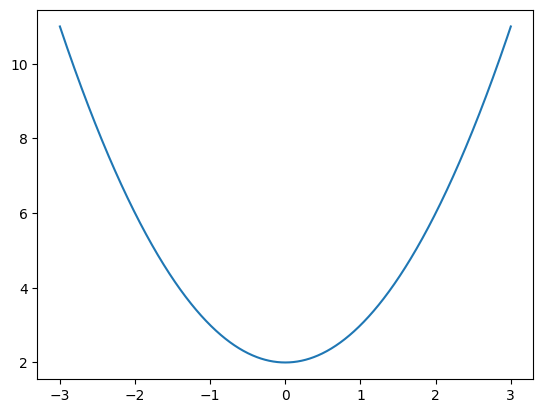

In [ ]:
plt.plot(x,f(x))
plt.show()

Below is an example of the process of testing a point for integration.

In [ ]:
M,a,b = 10,1,2 # max, left bound, right bound
x = a + (b-a)*np.random.random()
y = M*np.random.random()
print('Point to test:',round(x,4),round(y,4))
print('Value of f('+str(round(x,4))+'):',round(f(x),4))
print('Is it above or below f?','Above' if y>f(x) else 'Below')

Point to test: 1.8241 2.7055
Value of f(1.8241): 5.3272
Is it above or below f? Below


Doing this en masse with $N$ points allows us to estimate the value of $\int_a^bf(x)dx$.

In [ ]:
N = 1000000
S = 0
for i in range(N):

    x = a + (b-a)*np.random.random()
    y = M*np.random.random()

    S += (y < f(x))

print('Predicted Value:',M*(b-a)*(S/N))
print('Real Value:',integrate(f,a,b)[0])

Predicted Value: 4.32689
Real Value: 4.333333333333333


### Complete Function

This can then all be placed into a function. The method was slightly changed to tighten the scope of the random $y$ values by restricting them to the minimum and maximum of the function, allowing more points to be closer to the line, and better approximate its value.

In [ ]:
def monte_carlo_integrate(f,a,b,N=1000000):

    x,S = np.linspace(a,b,1000),0
    M,m = max(f(x)),min(f(x)) # max, min
    i,r = b-a, M-m # interval, range

    for _ in range(N):
        x = a + i*np.random.random()
        y = m + r*np.random.random()
        S += (y < f(x))

    return i*r*(S/N)+i*m

Additionally, defining the error function helps to weigh the accuracy of this.

In [297]:
def error(found,real):
  if real == 0:
    return 'Undefined'
  else:
    return str(round(abs((found-real)/real)*100,3))+'%'

The new function and can be compared to real solutions below by editing the bounds and the lambda function.

As the estimation is built on random numbers, it may not be consistent in how close it is to the correct answer.

In [299]:
f = lambda x: x**2 + 2
a,b = 1,2
estimation = monte_carlo_integrate(f,a,b)
real_value = integrate(f,a,b)[0]
print('Predicted Value:',round(estimation,4))
print('Real Value:',round(real_value,4))
print('Error:',error(estimation,real_value))

Predicted Value: 4.3338
Real Value: 4.3333
Error: 0.01%


## Visualization



### Graphic Representation

Since the Monte Carlo method charts points against the curve, this can be easily visualized. This function uses the same Monte Carlo method as the previous function, but this time saves all points and plots them on a graph.

In [300]:
def plot_monte_carlo(func, a, b, N=500):
    x = np.linspace(a,b,1000)
    M,m = max(func(x)),min(func(x)) # max, min
    i,r = b-a, M-m # interval, range

    x_points = a + i*np.random.random(N) # generate N x values
    y_points = m + r*np.random.random(N) # generate N y values
    below = y_points < func(x_points) # get indices of all points below curve

    px = np.linspace(a - 1, b + 1, 251)
    y = func(px)
    plt.plot(px, y, label="f(x)", color='black') # plot actual function

    plt.gca().add_patch(Rectangle((a,0),i,m,fc='lightgreen',label='Calculated Minimum')) # mark area not determined through monte carlo method
    plt.scatter(x_points[below], y_points[below], color='green', label='Points below f(x)') # mark points under curve
    plt.scatter(x_points[np.invert(below)], y_points[np.invert(below)], color='red', label='Points above f(x)') # mark poins above curve

    plt.xlim(a-1,b+1)
    plt.ylim(min(0,min(y) if min(y) >= 0 else min(y)-0.1*r),max(0,max(y) if max(y) <= 0 else max(y)+0.1*r))
    plt.legend()

    plt.title("Monte Carlo Integration Visualization")
    plt.figtext(0.5, 0.01, "Approximation: "+str(round(i*r*sum(below)/N+i*m,3))+'        Real: '+str(round(integrate(func,a,b)[0],3)), ha="center", fontsize=10)
    plt.figtext(0.5, -.03, 'Error: '+error(i*r*sum(below)/N+i*m,integrate(func,a,b)[0])+'        Points: '+str(N), ha="center", fontsize=10)
    plt.show()

All parameters for the method can be changed below:
- $f$, the function
- $a$ and $b$, the bounds of integration
- $N$, the number of points to use for calculation/visualization
 - Lower values of $N$ (~1000) provide better visualization
 - Higher values of $N$ (~100000) provide better accuracy

Example functions include `np.sin(x)` ($sin(x)$), `x**2+ 3*x + 4` ($x^2+3x+4$) and `np.exp(x)` ($e^x$)

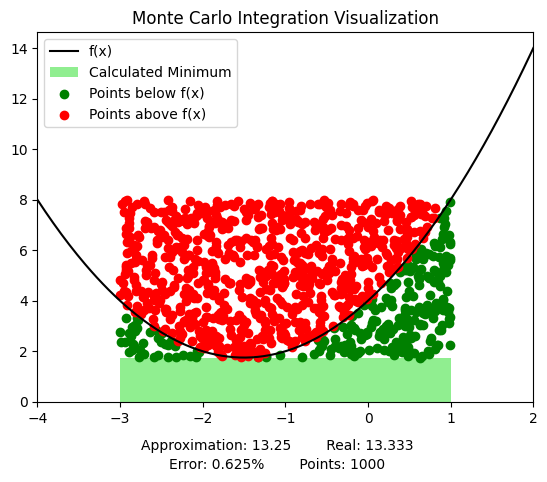

In [312]:
f = lambda x: x**2+ 3*x + 4
a,b = -3,1
N = 1000
plot_monte_carlo(f,a,b,N)

### Convergence Graph

The performance of the Monte Carlo method can be directly visualized by graphing the convergence and error over a variable number of points.

In [345]:
def show_convergence(f,a,b):
  iterations = np.logspace(1, 6, 90, dtype=int) # Creates logarithmically spaced numbers for iterations
  estimated_areas,errors = [],[]
  real = integrate(f,a,b)[0]

  for N in iterations:
    estimated_area = monte_carlo_integrate(f, a, b, N)
    estimated_areas.append(estimated_area)
    errors.append(max(float(error(estimated_area,real)[:-1]),0.001))

  _,ax = plt.subplots(2,1)
  for i in range(2):
    ax[i].set_xscale('log')
    ax[i].set_xlim(10,10**6)
    ax[i].plot(iterations, errors if i else estimated_areas)
    ax[i].set_ylabel('Error (%)' if i else ('Estimated Area'))
    ax[i].grid(True)
  ax[0].set_title('Convergence of Monte Carlo Integration')
  ax[1].set_yscale('log')
  ax[1].set_xlabel('Number of Iterations (log scale)')
  ax[1].set_yticks([100,10,1,.1,.01,.001],['100%','10%','1%','0.1%','0.01%','0.001%'])
  plt.show()

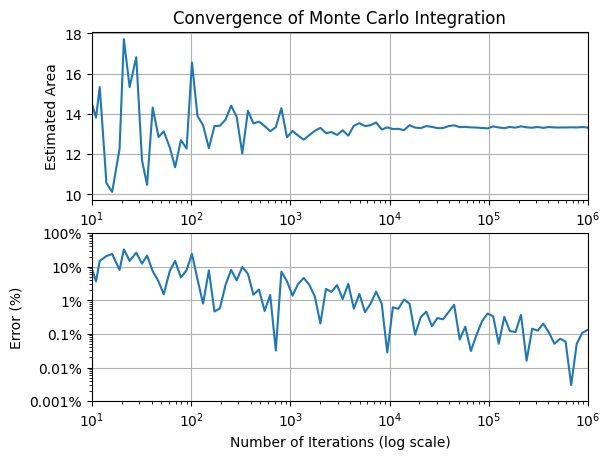

In [346]:
f = lambda x: x**2+ 3*x + 4
a,b = -3,1
show_convergence(f,a,b)